In [2]:
import numpy as np
import matplotlib.pyplot as plt

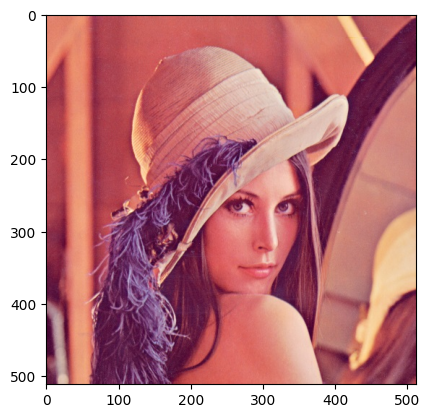

In [3]:
lena = plt.imread("imgs/lena.jpg") # lena image size: 512x512
if np.issubdtype(lena.dtype, np.integer):
    lena = lena / np.iinfo(lena.dtype).max  #plt will use pixel values [0,1] to show an image
plt.imshow(lena)

In [4]:
def translate(tx, ty):
  return np.array([[1, 0, tx],
                   [0, 1, ty],
                   [0, 0, 1]])
def scale(sx, sy):
  return np.array([[sx, 0, 0],
                   [0, sy, 0],
                   [0, 0, 1]])
def rotate(theta):
  return np.array([[np.cos(theta), -np.sin(theta), 0],
                   [np.sin(theta), np.cos(theta), 0],
                   [0, 0, 1]])

In [5]:
def apply(image, matrix, background): #image.ndim=background.ndim=3

  coord = np.fromfunction(lambda y, x: np.dstack((x + 0.5, y + 0.5, np.ones(background.shape[:2]))), background.shape[:2])
  sample_coord = np.einsum('ijk,lk->ijl', coord, np.linalg.inv(matrix))

  sample_coord_x = np.round(sample_coord[:,:,0]).astype(int)
  sample_coord_y = np.round(sample_coord[:,:,1]).astype(int)
  clip_sample_coord_x = np.clip(sample_coord_x, 0, image.shape[1] - 1)
  clip_sample_coord_y = np.clip(sample_coord_y, 0, image.shape[0] - 1)

  #画像サイズの有効範囲内の画素のみを取得
  samplable = (sample_coord_x >= 0) & (sample_coord_x < image.shape[1]) & (sample_coord_y >=0) & (sample_coord_y < image.shape[0])
  if image.ndim == 3:
    samplable = np.tile(samplable.reshape(samplable.shape + (1,)), (1, 1, image.shape[2]))

  return np.where(samplable, image[clip_sample_coord_y, clip_sample_coord_x], background)

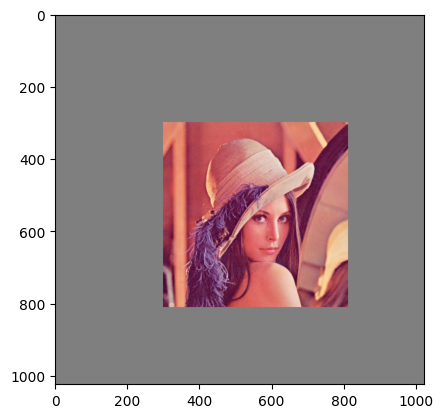

In [6]:
background = np.full((1024, 1024, 3), 0.5)
plt.imshow(apply(lena, translate(300,300),background))

In [15]:
lena.shape[:2]

(512, 512)

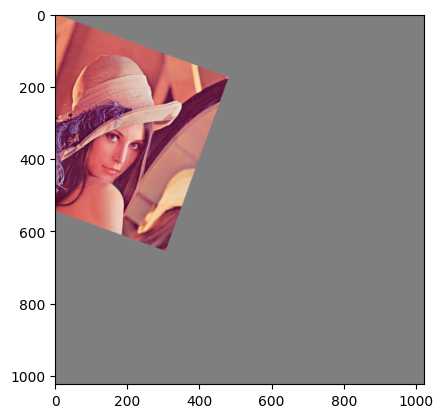

In [11]:
plt.imshow(apply(lena, rotate(np.pi / 9.0),background))

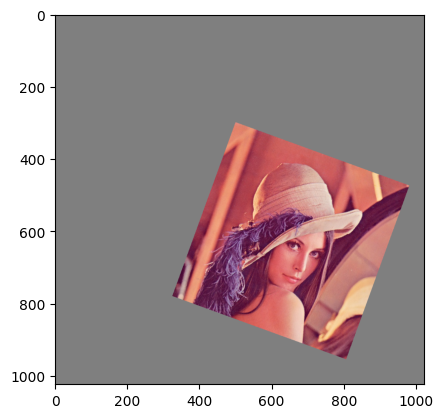

In [12]:
plt.imshow(apply(lena, translate(500,300)@rotate(np.pi / 9.0),background))

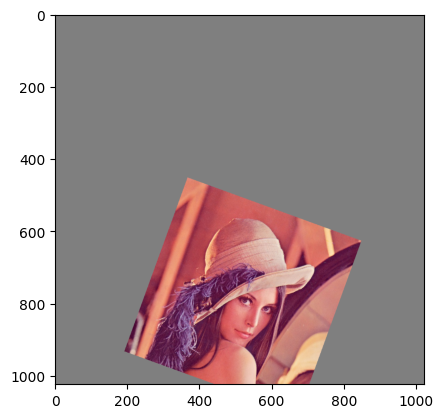

In [13]:
# 18度回転後に、(500,300)に移動
plt.imshow(apply(lena, rotate(np.pi / 9.0)@translate(500,300),background))